# Principal Component Analysis with Cancer Data

In [307]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [308]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")# , names= colnames)
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [309]:
cancer_df = cancer_df.drop('ID', axis=1)

In [310]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [311]:
#cancer_df = cancer_df.drop('ID')
cancer_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [312]:
cancer_df.shape

(699, 10)

In [313]:
#Replace ? with nan
#cancer_df = cancer_df.replace('?', np.nan)
#cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('float64')


In [314]:
#Lets analysze the distribution of the various attributes
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [315]:
#finding unique data in data set.
cancer_df.apply(lambda x: len(x.unique()))

ClumpThickness                 10
Cell Size                      10
Cell Shape                     10
Marginal Adhesion              10
Single Epithelial Cell Size    10
Bare Nuclei                    11
Normal Nucleoli                10
Bland Chromatin                10
Mitoses                         9
Class                           2
dtype: int64

In [316]:
#Get the features and labels seperated
features=cancer_df.loc[:,cancer_df.columns!='Class']
labels=cancer_df.loc[:,'Class'].values
print(features.shape,labels.shape)

(699, 9) (699,)


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [317]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [318]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [319]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [320]:
#There is only one dimension which is of object type and it is possible that there are records in Bare Nuclei feature where missing data is there
cancer_df[cancer_df['Bare Nuclei'] == '?']

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [322]:
count = cancer_df[cancer_df['Bare Nuclei'] == '?']
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [323]:
cancer_df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [324]:
temp = pd.DataFrame(cancer_df['Bare Nuclei'].str.isdigit())
temp[temp['Bare Nuclei'] == False]
temp[temp['Bare Nuclei'] == False].count() 



Bare Nuclei    16
dtype: int64

In [327]:
cancer_df= cancer_df.replace('?', 0)

In [328]:
# Change Bare Nuclien column from object datatype to int64 datatype
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')
cancer_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [279]:
#cancer_df = cancer_df.apply(lambda x: x.fillna(x.mode()),axis=0)


In [330]:
cancer_df.isnull().values.any()

False

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [209]:
# Check for correlation of variable

In [210]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [211]:
#Let us check for pair plots

In [212]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

C:\pwa\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\pwa\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


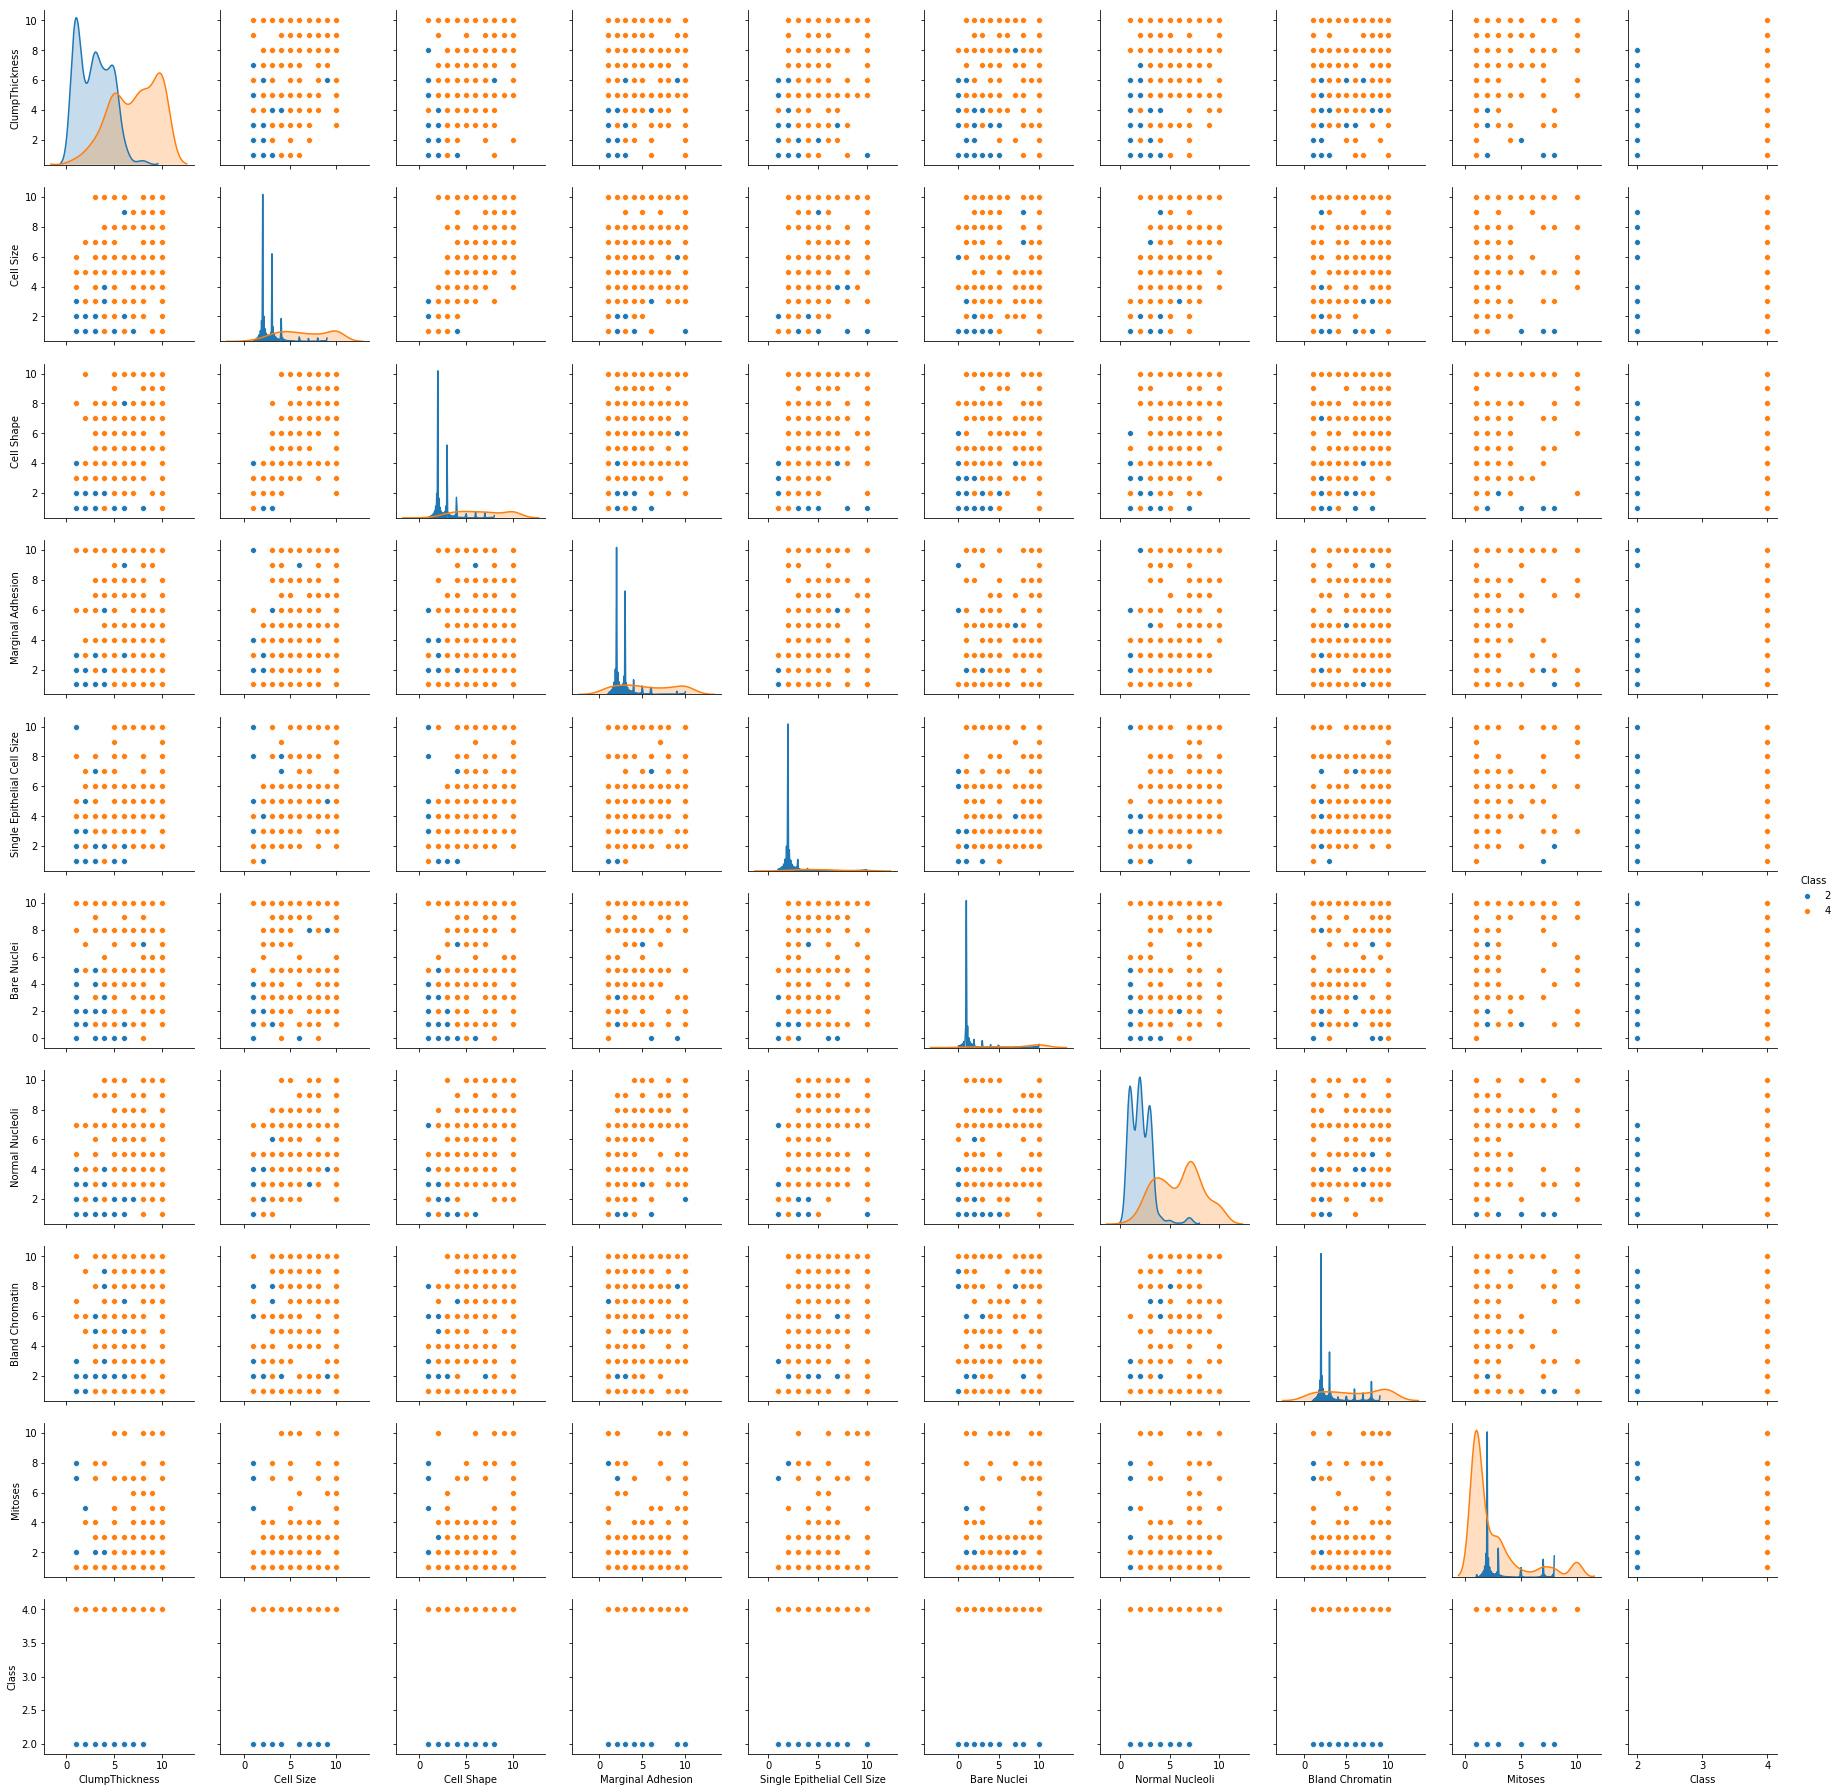

In [331]:
sns.pairplot(cancer_df, diag_kind='kde', hue = 'Class')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [215]:
# We could see most of the outliers are now removed.

In [332]:
cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


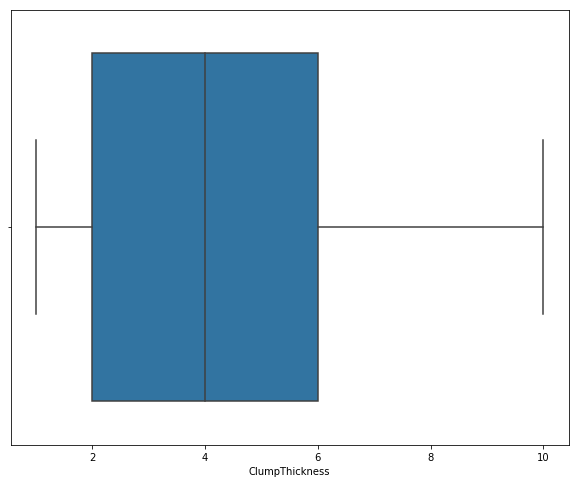

In [333]:
plt.figure(figsize=(10, 8)) 
sns.boxplot(x= 'ClumpThickness', data=cancer_df)

In [334]:
cancer_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

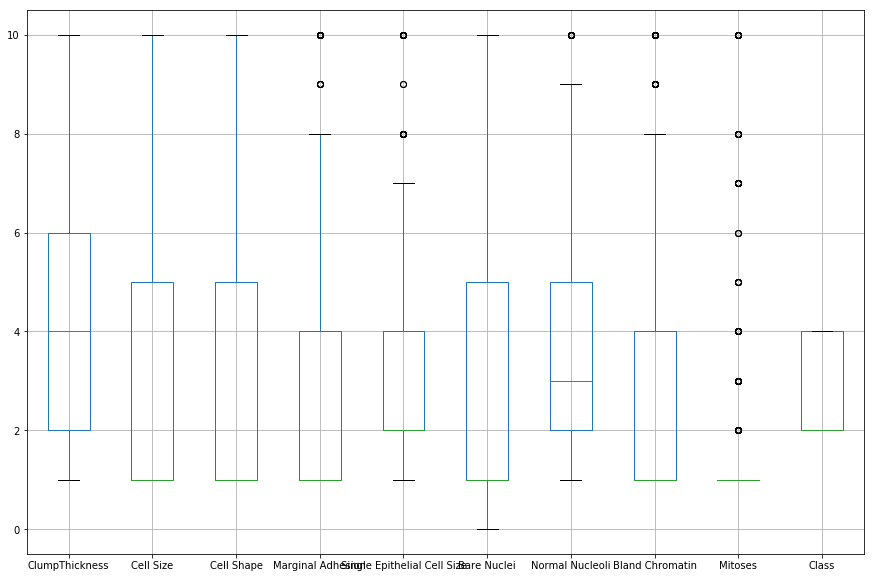

In [335]:

cancer_df.boxplot(figsize=(15, 10))


In [219]:
# Outliers are seen in Columns Marginal Adhesion, Single Epithelial Cell Size, 'Normal Nucleoli and Mitoses.
#Using Crosstab we compare the distribution and handle the outlier after onserving the spread

In [336]:

pd.crosstab(cancer_df.iloc[:,3], cancer_df['Class'], normalize=True)

Class,2,4
Marginal Adhesion,,
1,0.536481,0.045780
2,0.052933,0.030043
3,0.044349,0.038627
4,0.007153,0.040057
5,0.005722,0.027182
6,0.005722,0.025751
7,0.000000,0.018598
8,0.000000,0.035765
9,0.001431,0.005722


In [337]:
cancer_df.iloc[:,3]=np.where(cancer_df.iloc[:,3]>3,3,cancer_df.iloc[:,3])
pd.crosstab(cancer_df.iloc[:,3], cancer_df['Class'], normalize=True)

Class,2,4
Marginal Adhesion,,
1,0.536481,0.045780
2,0.052933,0.030043
3,0.065808,0.268956


In [339]:
#data.iloc[:,8]=np.where(data.iloc[:,8]>2,2,data.iloc[:,8])
cancer_df.iloc[:,4]=np.where(cancer_df.iloc[:,4]>3,3,cancer_df.iloc[:,4])
pd.crosstab(cancer_df.iloc[:,4],cancer_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,49,217


In [340]:
cancer_df.iloc[:,5]=np.where(cancer_df.iloc[:,5]>5,5,cancer_df.iloc[:,5])
pd.crosstab(cancer_df.iloc[:,5],cancer_df['Class'])

Class,2,4
Bare Nuclei,,
0,14,2
1,387,15
2,21,9
3,14,14
4,6,13
5,16,188


In [341]:
cancer_df.iloc[:,6]=np.where(cancer_df.iloc[:,6]>3,3,cancer_df.iloc[:,6])
pd.crosstab(cancer_df.iloc[:,6],cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,149,232


In [342]:
cancer_df.iloc[:,7]=np.where(cancer_df.iloc[:,7]>3,3,cancer_df.iloc[:,7])
pd.crosstab(cancer_df.iloc[:,7],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,26,194


In [343]:
cancer_df.iloc[:,8]=np.where(cancer_df.iloc[:,8]>2,2,cancer_df.iloc[:,8])
pd.crosstab(cancer_df.iloc[:,8],cancer_df['Class'])

Class,2,4
Mitoses,,
1,445,134
2,13,107


In [344]:
#Get the features and labels seperated
X=cancer_df.loc[:,cancer_df.columns!='Class']
Y=cancer_df.loc[:,'Class'].values
print(X.shape,Y.shape)

(699, 9) (699,)


In [345]:

from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
X_train_stdseed = 7  # Random numbmer seeding for reapeatability of the code
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [346]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X)  # scale training and test data independently to prevent data leaks
#X_test_std = sc.fit_transform(Xt)

C:\pwa\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\pwa\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [230]:
# PCA
# Step 1 - Create covariance matrix


In [347]:
X_train_std.shape

(699, 9)

In [348]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.54229939 0.57136516 0.60555454
  0.43110601 0.57943454 0.44270396]
 [0.64583645 1.00143266 0.90818117 0.68273819 0.69491616 0.69907642
  0.51149494 0.71023435 0.49446483]
 [0.65552689 0.90818117 1.00143266 0.66691898 0.68253087 0.71016243
  0.50271211 0.70002751 0.46579632]
 [0.54229939 0.68273819 0.66691898 1.00143266 0.60556021 0.667526
  0.41648052 0.60557436 0.39713476]
 [0.57136516 0.69491616 0.68253087 0.60556021 1.00143266 0.66160975
  0.44377783 0.65266994 0.42666063]
 [0.60555454 0.69907642 0.71016243 0.667526   0.66160975 1.00143266
  0.48573922 0.65950907 0.47144592]
 [0.43110601 0.51149494 0.50271211 0.41648052 0.44377783 0.48573922
  1.00143266 0.52137774 0.2848407 ]
 [0.57943454 0.71023435 0.70002751 0.60557436 0.65266994 0.65950907
  0.52137774 1.00143266 0.49249471]
 [0.44270396 0.49446483 0.46579632 0.39713476 0.42666063 0.47144592
  0.2848407  0.49249471 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [233]:
# Step 2- Get eigen values and eigen vector

In [349]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.32308402 -0.02390556  0.06821387 -0.03457825  0.87542249  0.1229896
   0.11385425 -0.19694626  0.2365478 ]
 [-0.37893177 -0.71485256 -0.02413463 -0.14962409  0.03514867 -0.00241535
  -0.15059147  0.47956402 -0.26177468]
 [-0.37612676  0.69416549 -0.04849027 -0.17893591  0.09007328 -0.10332984
  -0.15144758  0.48206625 -0.26111124]
 [-0.33179831  0.03743134 -0.04674663 -0.34525059 -0.35933165  0.43541137
   0.08664073  0.09779498  0.65677453]
 [-0.3410915   0.02573212 -0.02641982 -0.19646819 -0.15305467  0.31462949
  -0.37286356 -0.63170721 -0.42801636]
 [-0.3539326  -0.05437116 -0.007267   -0.10845475 -0.14331854 -0.81751854
  -0.12400208 -0.27079822  0.28701096]
 [-0.26497885  0.0129859  -0.61231652  0.70721267 -0.04310635  0.09557722
  -0.16551857  0.01998117  0.12548895]
 [-0.35078614  0.00830006 -0.01718898  0.1029606  -0.1764     -0.02770287
   0.8553716  -0.11516193 -0.29862451]
 [-0.25610461  0.03593907  0.78374105  0.51389505 -0.13500577  0.08588871
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [350]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 63.01176482  71.00184047  77.95558973  83.13622186  87.63629038
  91.93665431  95.57105475  98.98877582 100.        ]


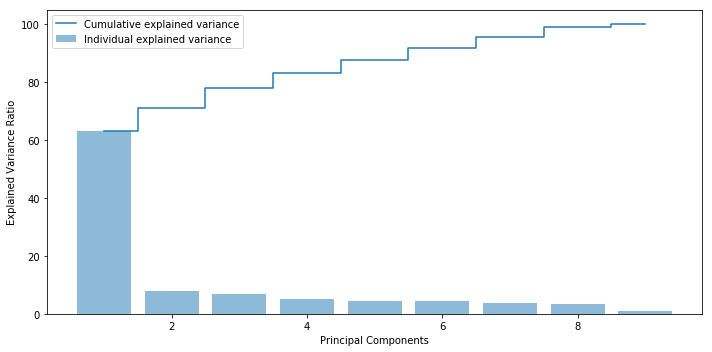

In [351]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [354]:
from sklearn.decomposition import PCA  
pca = PCA()

In [356]:
pca_features = pca.fit_transform(X_train_std) 
pca_features 

array([[-1.34672049, -0.72826386,  0.97315143, ..., -0.24495555,
         0.24911553,  0.03607077],
       [ 1.85841886, -0.98137184, -0.55969568, ..., -0.33201584,
        -0.20891945,  0.02403558],
       [-1.38212943, -0.78073852,  0.9382093 , ..., -0.39393613,
        -0.28696302,  0.04891777],
       ...,
       [ 4.03582875,  0.94082353,  0.37807987, ..., -0.24790188,
         0.67253749, -0.13582146],
       [ 2.68095233, -1.08462231, -0.69277274, ...,  0.32561323,
         0.09316541,  0.44692944],
       [ 3.12849418, -1.1212662 , -0.87279737, ...,  0.15556816,
        -0.42507937,  0.00928338]])

# Q10 Find correlation between components and features

In [375]:
features_scale = pd.DataFrame(X_train_std)
pca_features = pd.DataFrame(pca_features)
features_scale.corrwith(pca_features, axis = 0) 

0    0.769392
1   -0.020466
2   -0.141556
3    0.245362
4   -0.272390
5   -0.168469
6   -0.094664
7   -0.015364
8   -0.010842
dtype: float64

In [383]:
pca.components_

array([[ 0.32308402,  0.37893177,  0.37612676,  0.33179831,  0.3410915 ,
         0.3539326 ,  0.26497885,  0.35078614,  0.25610461],
       [ 0.06821387, -0.02413463, -0.04849027, -0.04674663, -0.02641982,
        -0.007267  , -0.61231652, -0.01718898,  0.78374105],
       [-0.03457825, -0.14962409, -0.17893591, -0.34525059, -0.19646819,
        -0.10845475,  0.70721267,  0.1029606 ,  0.51389505],
       [-0.87542249, -0.03514867, -0.09007328,  0.35933165,  0.15305467,
         0.14331854,  0.04310635,  0.1764    ,  0.13500577],
       [ 0.2365478 , -0.26177468, -0.26111124,  0.65677453, -0.42801636,
         0.28701096,  0.12548895, -0.29862451,  0.07409395],
       [-0.19694626,  0.47956402,  0.48206625,  0.09779498, -0.63170721,
        -0.27079822,  0.01998117, -0.11516193,  0.05684719],
       [ 0.11385425, -0.15059147, -0.15144758,  0.08664073, -0.37286356,
        -0.12400208, -0.16551857,  0.8553716 , -0.14302349],
       [ 0.1229896 , -0.00241535, -0.10332984,  0.43541137,  0

In [385]:
df_pca = pd.DataFrame(pca.components_, columns= X.columns)

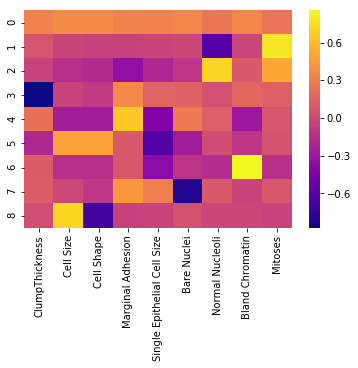

In [386]:
sns.heatmap(df_pca, cmap='plasma',)

the corretalion of PCA componet 3 and ClumpThickness, cellshape (positive corelation) and PCA columm 8 has high negative corelation
PCA column 0 is observerd as no corelation

Bare Nuclei and PCA 7 is negative corelated 
PCA1 and Normal Nucleoli are high postive corelated


# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [357]:
mv_df = pd.read_csv("movies_metadata.csv")# , names= colnames)
mv_df.head(10)

C:\pwa\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [359]:
mv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [407]:
jokes_df = pd.read_csv("jokes.csv")# , names= colnames)


In [408]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [410]:
jokes_df.shape

(24983, 101)

# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [412]:
ratings = jokes_df.iloc[:200:,]
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [413]:

ratings= ratings.drop('NumJokes', axis=1)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Change the column indices from 0 to 99

In [414]:
ratings.columns=range(0,100)
ratings.head() 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [415]:
ratings= ratings.replace('99.00', 0)

# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [416]:
sc = StandardScaler()

ratings_diff= sc.fit_transform(ratings)
 

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [417]:
ratings_diff = pd.DataFrame(ratings_diff) 
ratings_diff.mean() 

0    -4.940492e-17
1    -6.217249e-17
2    -6.106227e-17
3     2.536860e-16
4    -8.881784e-18
5    -8.881784e-18
6    -1.665335e-18
7     2.331468e-17
8    -9.492407e-17
9     9.992007e-18
10   -2.386980e-17
11    1.126876e-16
12    6.661338e-17
13   -1.221245e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20   -4.718448e-18
21    9.020562e-17
22    3.275158e-17
23   -5.606626e-17
24    4.996004e-18
25    2.983724e-17
26   -5.440093e-17
27   -1.672273e-17
28   -2.775558e-18
29    1.054712e-17
          ...     
70    1.743050e-16
71    1.443290e-17
72    2.153833e-16
73   -6.772360e-17
74    2.997602e-17
75    4.996004e-17
76   -3.030909e-16
77    7.327472e-17
78    7.771561e-18
79   -2.886580e-16
80    3.885781e-17
81   -1.598721e-16
82   -6.328271e-17
83    1.665335e-16
84    2.642331e-16
85    2.886580e-17
86   -3.441691e-17
87    2.831069e-16
88   -2.220446e-17
89   -3.974598e-16
90    1.004752e-16
91   -3.2085